# 泰坦尼克号生存率预测

#### 步骤索引  
1. 提出问题
2. 数据预分析
    * 导入数据
    * 合并数据集
    * 查看数据集特征
3. 数据处理
    * 缺失值处理
    * 特征值处理（数值化）
4. 数据分析
    * 相关性分析
    * 生还率影响因素分析
5. 生还率预测
    * 机器学习模型构建
    * 机器学习模型训练
    * 用测试数据对模型进行评分
    * 用模型预测生还率

#### 字段数值意义
* Survived　　0：死亡；1：生还  
* Pclass　　　1：上等舱；2：中等舱；3：下等舱 
* Sex　　　　1：男性；0：女性             
* Embarked　　0：表示S=英国 南安普顿Southampton；1：表示C=法国 瑟堡市Cherbourg；2：表示Q=爱尔兰 昆士敦Queenstown     
* IsAlone　　 1：表示是独自一人登船；0：表示有亲属陪伴  
* Titel　　　 0：表示'Mr'；1：表示'Miss'；2：表示'Mrs'；3：表示'Master'；4：表示'Rare' 

## 1、提出问题

泰坦尼克号事故中，乘客的生还率受什么因素影响较大，是否可以根据乘客的数据记录预测出乘客的生还率

## 2、数据预分析

### 2.1、导入数据

In [125]:
import warnings
warnings.filterwarnings('ignore') # 忽略警告
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [126]:
'''我们先导入测试数据和训练数据'''
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print("训练数据有{}行{}列".format(train_data.shape[0],train_data.shape[1]))
print("测试数据有{}行{}列".format(test_data.shape[0],test_data.shape[1]))

训练数据有891行12列
测试数据有418行11列


### 2.2、合并数据集

In [127]:
'''为了便于统一做数据处理，所以这里我们先把两组数据集合并为一个'''
whole_data = train_data.merge(test_data,how='outer')
whole_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.3、查看数据集特征

In [128]:
'''查看数据的特征，初步拟定数据清理的方法'''
whole_data.info()
'''
合并数据之后总共有1309条数据记录，其中对于缺失的数据我们重点处理：
1、对于数值型数据：年龄（Age）、票价（Fare），我们可以通过取平均值的方式填补空值；
2、对于分类型数据：船舱号（Cabin）、登船港口（Embarked)，我们可以取最多的一类来填补空值；
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


'\n合并数据之后总共有1309条数据记录，其中对于缺失的数据我们重点处理：\n1、对于数值型数据：年龄（Age）、票价（Fare），我们可以通过取平均值的方式填补空值；\n2、对于分类型数据：船舱号（Cabin）、登船港口（Embarked)，我们可以取最多的一类来填补空值；\n'

## 3、数据处理

### 3.1、缺失值处理

因为在数据分析预测过程中，要求作为特征值的数据最好不能为空值（否则会影响预测），所以我们需要填补数据集中的缺失值：  
对于缺失值的处理，我们一般遵循以下原则：  
* 对于数据类型，处理缺失值最简单的方法就是用平均数来填充缺失值；
* 对于分类类型，处理缺失值最简单的方法就是用频繁出现的值填充缺失值；

1) 首先处理whole_data数据集中的数据类型的缺失值：年龄（Age）、票价（Fare）

In [129]:
'''
根据之前的数据信息，年龄字段的缺失值是1309-1046=263条，我们用年龄的平均值填补年龄字段的缺失值
'''
whole_data['Age'].fillna(whole_data['Age'].mean(),inplace=True)

In [130]:
'''
接下来我们处理票价字段的缺失值，所幸缺失数据只有一条，大大减小了我们分析预测的误差；同理，我们用票价的平均值填补票价字段的缺失值
'''
whole_data['Fare'].fillna(whole_data['Fare'].mean(),inplace=True)

In [131]:
'''
检查年龄（Age）、票价（Fare）字段的缺失值是否填补完毕
'''
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


2) 接下来处理whole_data数据集中的分类类型的缺失值：船舱号（Cabin）、登船港口（Embarked)

In [132]:
'''
我们可以看到，船舱号(Cabin)字段的缺失值达到1309-295=1014条，缺失值比例较大，如果用频繁出现的值去填充缺失值，数据的误差会大大增加，  
可能会给我们的分析预测提供错误的方向，所以这里，我们不用频繁出现的值去填充缺失值，我们直接将缺失值归为未知一类；（注：如果特征值缺失  
的比较多，那么如果该特征值不是非常重要，我们可以舍弃）
'''
whole_data['Cabin'].fillna('unknow',inplace=True)

In [133]:
'''
对于登船港口(embarked)字段，由于缺失值为1309-1307=2条，缺失比例较小，所以我们可以用频繁出现的值填补缺失值：首先查看该字段每一类数据  
的数量，然后选取数量最多的那一类去填补缺失值
'''
print(whole_data['Embarked'].value_counts()) # 统计每一类的数量

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [134]:
'''我们可以看出S港口的数量最多，所以我们用S港口填补登船港口(embarked)字段的缺失值'''
whole_data['Embarked'].fillna('S',inplace=True)

In [135]:
'''
查看数据集信息，确保缺失值填补完成
'''
whole_data.info()
'''
我们可以看到缺失值处理已经全部完成，由于生还(Survived)字段是我们要进行预测是，所以不需要处理这一列
'''
whole_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknow,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknow,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknow,S


### 3.2、特征值处理（数值化）

我们后面需要用到机器学习的方法进行生还率是预测，所以数据集的特征值需要全部数值化；对于数据，我们有以下三个分类：  
1) 数值数据：
    * 乘客编号（PassengerId）
    * 年龄（Age）
    * 船票价格（Fare）
    * 同代直系亲属人数（SibSp）
    * 不同代直系亲属人数（Parch）
2) 分类数据：
  - 已分类：
    * 船舱等级(Pclass)
    * 性别(Sex)
    * 登船港口(Embarked)
  - 未分类：
    * 乘客姓名（Name）
    * 客舱号（Cabin）
    * 船票编号（Ticket）   

3) 时间序列数据：无  

下面我们就将这些特征数据进行数值化

### 3.2.1、数值特征值进行数值化  

因为乘客编号（PassengerId）、年龄（Age）、船票价格（Fare）已经是我们所需要的，所以这里我们要处理的只有同代直系亲属人数（SibSp）、不同代直系亲属人数（Parch），我们需要增加两个更有意义的字段：亲属人数(FamilySize），是否独自一人(IsAlone)

In [136]:
'''
亲属人数 = 代直系亲属人数（SibSp）+ 不同代直系亲属人数（Parch）+ 本人
'''
whole_data['FamilySize'] = whole_data['SibSp'] + whole_data['Parch'] + 1
'''
1：表示是独自一人登船；0：表示有亲属陪伴
'''
whole_data['IsAlone'] = whole_data['FamilySize'].map(lambda x : 1 if x == 1 else 0)

In [137]:
'''
至此，同代直系亲属人数（SibSp）、不同代直系亲属人数（Parch）这两个字段已经没有用处，我们可以把它删掉
'''
whole_data.drop('SibSp',axis=1,inplace=True)
whole_data.drop('Parch',axis=1,inplace=True)
'''
查看数据是否修改完毕
'''
whole_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,unknow,S,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,unknow,S,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,unknow,S,1,1


### 3.2.2、分类特征值进行数值化  

1) 性别特征值进行数值化：1：男性；0：女性

In [138]:
whole_data['Sex']=whole_data['Sex'].map({'male':1,'female':0})

2) 登船港口特征值进行数值化：0：表示S=英国 南安普顿Southampton；1：表示C=法国 瑟堡市Cherbourg；2：表示Q=爱尔兰 昆士敦Queenstown

In [139]:
whole_data['Embarked']=whole_data['Embarked'].map({'S':0,'C':1,'Q':2})

3) 接下来我们对名字(Name)进行数值化：因为名字比较复杂，所以我们需要先进性数据解剖

In [140]:
'''
我们先看看名字字段的组成规律
'''
whole_data['Name'].head()
'''
我们发现并不是名字中的每个部分对我们的分析都有帮助，但是字段中间部分的头衔似乎是有规律的，我们可以提取头衔特征值，例如：  
Braund, Mr. Owen Harris的头衔是Mr
'''

'\n我们发现并不是名字中的每个部分对我们的分析都有帮助，但是字段中间部分的头衔似乎是有规律的，我们可以提取头衔特征值，例如：  \nBraund, Mr. Owen Harris的头衔是Mr\n'

In [141]:
'''
接下来我们要用分割字符的方法从名字(Name)字段中提取头衔特征值，由于涉及到字符分割，所以我们需要构建提取字符的函数，然后在让名字字段的每个  
数据调用该函数
'''
def getTitel(name): # 构建从名字中提取头衔的函数
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip() # 删除字符串首尾指定的字符，默认为空格
    return str3
whole_data['Titel'] = whole_data['Name'].map(getTitel) 

In [142]:
'''
现在我们需要将头衔(Titel)字段进行数值化，需要先查看分为哪几类头衔
'''
whole_data['Titel'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Lady              1
Capt              1
Mme               1
Dona              1
the Countess      1
Sir               1
Don               1
Name: Titel, dtype: int64

In [143]:
'''
由于头衔太多，我们需要把头衔再次归类：总共可以归为Mr、Miss、Mrs、Master、Rare  
这里我们要用replace方法替换字符串
'''
whole_data['Titel'] = whole_data['Titel'].replace(['Ms','Mlle','Lady'],'Miss') # replace是替换字符的方法
whole_data['Titel'] = whole_data['Titel'].replace(['Mme'],'Mrs')
whole_data['Titel'] = whole_data['Titel'].replace(['Sir'],'Mr')
whole_data['Titel'] = whole_data['Titel'].replace(['Dr','Rev','Col','Major','Don','Capt','the Countess','Dona','Jonkheer'],'Rare')

In [144]:
'''
现在我们将头衔进行数值化：0：表示'Mr'；1：表示'Miss'；2：表示'Mrs'；3：表示'Master'；4：表示'Rare'
'''
whole_data['Titel'] = whole_data['Titel'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4})

In [145]:
whole_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Titel
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,unknow,0,2,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,1,2,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,unknow,0,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,0,2,0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,unknow,0,1,1,0


4) 剔除不需要的特征值：
    * 我们已经提取了头衔特征值，所以名字字段可以删除；
    * 对于客舱号（Cabin）字段，由于缺失值过多，我们可以把这个特征值也剔除；
    * 对于船票编号（Ticket）字段，对于我们分析预测生还率没有太大帮助，所以也可以剔除；

In [146]:
'''
删除Name/Ticket/Cabin列
'''
whole_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [147]:
'''
至此我们已经完成了整个数据清洗工作，并且提取有效特征值9个
'''
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Embarked       1309 non-null int64
FamilySize     1309 non-null int64
IsAlone        1309 non-null int64
Titel          1309 non-null int64
dtypes: float64(3), int64(7)
memory usage: 112.5 KB


## 4、数据分析

### 4.1、相关性分析

1) 进行数据分析之前，我们需要把训练数据和测试数据分开，我们单独用训练数据进行特征值相关性分析

In [148]:
'''
前面我们已经知道训练数据的记录是891条，所以我们将891条训练数据和418条测试数据分开
'''
train_data = whole_data.iloc[0:891, : ]
test_data = whole_data.iloc[891: , : ]

In [149]:
'''
查看数据是否正确
'''
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null int64
FamilySize     891 non-null int64
IsAlone        891 non-null int64
Titel          891 non-null int64
dtypes: float64(3), int64(7)
memory usage: 76.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 10 columns):
PassengerId    418 non-null int64
Survived       0 non-null float64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Titel          418 non-null int64
dtypes: float64(3), int64(7)
memory usage: 35.

2) 计算训练数据集中各个特征值的相关系数

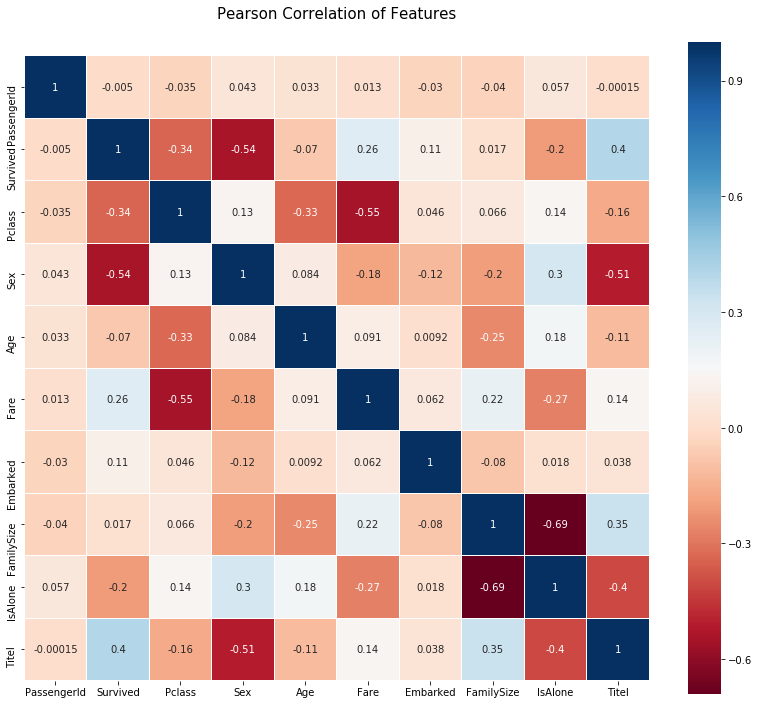

In [150]:
'''
我们通过热力图的方式展示各个特征值之间的相关性大小
'''
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [151]:
'''
我们根据与生存率的相关系数大小对特征值进行排序
'''
train_data.corr()['Survived'].sort_values(ascending =False)

Survived       1.000000
Titel          0.402555
Fare           0.257307
Embarked       0.106811
FamilySize     0.016639
PassengerId   -0.005007
Age           -0.070323
IsAlone       -0.203367
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

### 4.2、生还率影响因素分析

这里为了能直观地看到各个特征值对生还率的影响，我们采用可视化的方式；  

In [152]:
'''
因为我们下面要绘制多个可视化图表，且大部分处理方法一致，所以我们需要写个绘制可视化图表的函数
'''
def variable_visulization(feature):
    '''
    因为我们要做两个绘图，左边显示幸存人数对比柱状图，右边显示幸存几率柱状图；
    所以，我们要将figure分两个区域；
    下面的1、2分别代表1行2列，figsize代表绘图的大小；
    '''
    f , ax = plt.subplots(1,2,figsize=(10,5))
    '''
    我们需要在左边显示feature中每一分类的幸存人数、死亡人数对比柱状图；
    因为我们是想做出堆积柱状图，也就是，每一根柱子代表feature中的一个类别，柱子上分成幸存人数和死亡人数，所以我们需要同时
    根据[feature,'Survived]进行分组；
    count():是计算元素个数的函数（不包含空值、NAN值）；
    unstack():将多层次索引的series转化为DataFrame；
    plot():参数kind是指定什么类型的图，这里使用柱形图'bar'；参数stacked是指定是否堆积显示；参数ax是指定显示的区域位置；
    '''
    train_data.groupby([feature,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True,ax=ax[0])
    ax[0].set_ylabel('Number of passengers')
    ax[0].set_title(feature+' VS Survival VS count')
    ax[0].legend(['dead','alive'])
    '''
    我们需要在右边显示feature中每一分类的幸存率柱状图；
    因为幸存是1，死亡是0，所以均值就是幸存几率；
    这里我们只需要对feature进行分组，在每组中计算生还率；
    '''
    train_data.groupby(feature)['Survived'].mean().plot(kind='bar',ax=ax[1])
    ax[1].set_ylabel('Survival Rate')
    ax[1].set_title(feature+' VS Survival rate')
    plt.show()

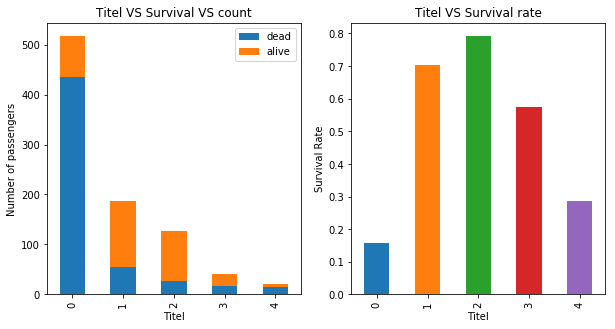

'\n从图中可以看出Miss和Mrs的生还率比较高，都为女\n'

In [153]:
'''
哪种头衔的人员生还率比较高
'''
variable_visulization('Titel')
'''
从图中可以看出Miss和Mrs的生还率比较高，都为女
'''

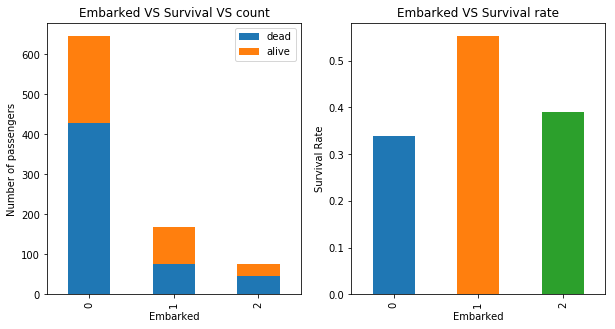

'\n从法国瑟堡市Cherbourg登船的人员生还率较高\n'

In [154]:
'''
哪个港口登船的人员生还率比较高
'''
variable_visulization('Embarked')
'''
从法国瑟堡市Cherbourg登船的人员生还率较高
'''

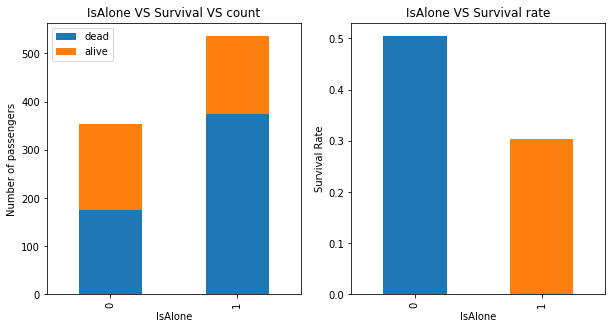

'\n从图中可以看出有亲属陪伴的人更容易存活下来，互相帮助\n'

In [155]:
'''
有家人陪伴的人是否更容易存活
'''
variable_visulization('IsAlone')
'''
从图中可以看出有亲属陪伴的人更容易存活下来，互相帮助
'''

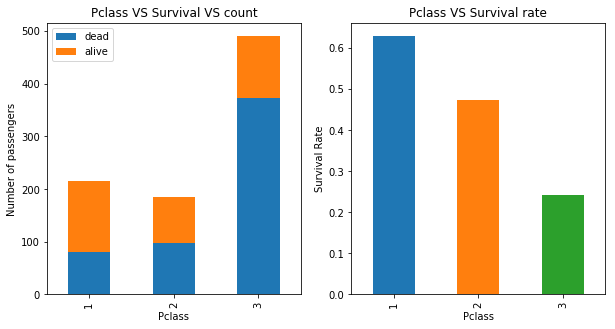

'\n我们可以看到船舱等级越高的乘客，生还几率更大，说明阶级制度还是存在的，尽管在灾难面前\n'

In [156]:
'''
船舱等级是否会影响乘客的生还率
'''
variable_visulization('Pclass')
'''
我们可以看到船舱等级越高的乘客，生还几率更大，说明阶级制度还是存在的，尽管在灾难面前
'''

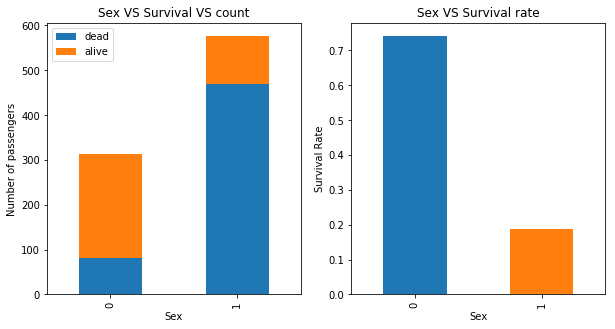

'\n我们可以看到女士的生还率大大高于男士\n'

In [157]:
'''
性别是否会影响乘客的生还率
'''
variable_visulization('Sex')
'''
我们可以看到女士的生还率大大高于男士
'''

## 5、生还率预测

### 5.1、机器学习模型构建

越靠近0相关性越小，所以我们从以上特征值中选取相关系数绝对值大于0.1的特征值进行下一步分析预测；我们保留以下的特征值：  
    * 头衔(Titel)          
    * 票价(Fare)         
    * 登船港口(Embarked)            
    * 是否独自一人(IsAlone)       
    * 船舱等级(Pclass)        
    * 性别(Sex)           

In [158]:
'''
训练数据集和测试数据集保留一样的特征值,我们需要以下几个数据集：  
    train_x:训练数据集（特征）
    train_y:训练数据集（输出）
    predict_x:预测数据集（特征）
    predict_y:预测数据集（输出）
'''
train_x = train_data.drop(['Survived','FamilySize','PassengerId','Age'],axis=1)
train_y = train_data['Survived']
predict_x = test_data.drop(['Survived','FamilySize','PassengerId','Age'],axis=1)

In [159]:
'''对数据进行标准化'''
train_x = preprocessing.scale(train_x)

In [160]:
'''
train_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签，格式：
X_train,X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.3, random_state=0)
参数解释：
train_data：被划分的样本特征集
train_target：被划分的样本标签
test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
random_state：是随机数的种子。
随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。
但填0或不填，每次都会不一样。
随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：
种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
'''
x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.3)

'''
查看划分之后的训练子集和测试子集的数据量
'''
print ('训练数据集特征：',x_train.shape ,
      '测试数据集特征：',x_test.shape)

print ('训练数据集输出：',y_train.shape ,
      '测试数据集输出：',y_test.shape)

训练数据集特征： (623, 6) 测试数据集特征： (268, 6)
训练数据集输出： (623,) 测试数据集输出： (268,)


### 5.2、机器学习模型训练

这里我们选用K邻近分类算法

In [161]:
model = KNeighborsClassifier() 
model.fit(x_train , y_train) # 输入训练数据开始训练机器学习模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 5.3、用测试数据对模型进行评分

In [162]:
model.score(x_test , y_test)

0.8022388059701493

### 5.4、用模型预测生还率

In [163]:
predict_y = model.predict(predict_x)
predict_y = predict_y.astype(int)
passenger_id = test_data['PassengerId']
predict_data = pd.DataFrame({ 'PassengerId': passenger_id , 'Survived': predict_y })
predict_data.shape
predict_data.head()
predict_data.to_csv('titanic_predict.csv' , index = False )

In [164]:
predict_data['Survived'].value_counts()


1    299
0    119
Name: Survived, dtype: int64


根据我们的预测模型，预测数据集中会有161名乘客获得生还，生还率为38.52%
